In [12]:
!pwd
isLocalServer = True

/notebook/personal/ksuchoi216/face-id-model


In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import json, os, sys
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn

cudnn.benchmark = True
plt.ion()

if isLocalServer is True:
  path_to_be_add = '/notebook/personal/ksuchoi216/face-identification-model/'
  if not path_to_be_add in sys.path:
    sys.path.insert(0, path_to_be_add)
    os.chdir(path_to_be_add)

  print(f'sys.path: {sys.path}')

def load_config():
  path_for_config = './configs/config.json'
  with open(path_for_config) as f:
    cfg = json.load(f)
  return cfg

cfg = load_config()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
sys.path: ['/notebook/personal/ksuchoi216/face-id-model/', '/notebook/personal/ksuchoi216/face-identification-model/', '/notebook', '/root/.pyenv/versions/3.9.1/lib/python39.zip', '/root/.pyenv/versions/3.9.1/lib/python3.9', '/root/.pyenv/versions/3.9.1/lib/python3.9/lib-dynload', '', '/root/.pyenv/versions/python39/lib/python3.9/site-packages']


# Loading model and data

250
 data 
0 jhoh
1 jhongyoo
2 jhyoo
3 kschoi
batch_size: 1 

dataset length: (608) = tr (486) + val (60) + tt (62)


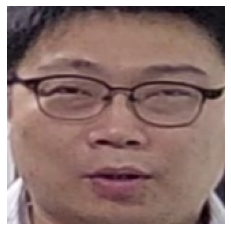

label: 2


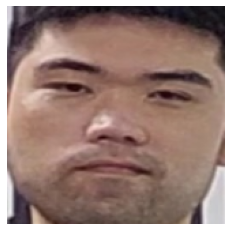

label: 1


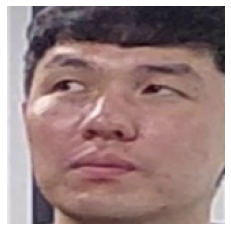

label: 0


In [18]:
from datasets import Folder_Dataset
from utils import imshow_dataloader

cfg = load_config()
folder_Dataset = Folder_Dataset(cfg['embedding'])
dataloaders, dataset_sizes, idx_to_class = folder_Dataset.createDataLoaders()

phase="train"
for i, (img, label) in enumerate(dataloaders[phase]):
  if i >= 3:
    break
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  print(f'label: {label}')  

In [24]:
from modules import Builder
import torchsummary

builder = Builder(cfg['model'])
model = builder.loadModel('./data/face-extraction-model.pt', 'cpu', classify=False)

device is cuda:0
Loading model was just completed.


# Feature extraction and data transfromation

In [27]:
from external_library import MTCNN
face_detector = MTCNN(image_size=240, margin=0, keep_all=True, min_face_size=40)


from utils import imshow_denormalization
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# phases = ['train', 'val', 'test']
phases = ['train']
for phase in phases:
  print(f'phase: {phase}')
  
  
  image_list = []
  embedding_list = []
  label_list = []
  
  for i, (img, label) in enumerate(dataloaders[phase]):
    face, prob = face_detector(img, return_prob = True)
    if face is not None:
      embedding = model(face)
      embedding = torch.squeeze(embedding).numpy()

      face = torch.squeeze(face).numpy()
      image_list.append(face)
      # print(f'img: {face.shape}/{type(facek)}')
      
      
      # print(f'embedding: {embedding.shape} {type(embedding)} label: {label} {type(label)}')  
      if embedding.shape[0] != 512:
        print(f'dimension errror - embedding.shape: {embedding.shape[0]}')
      embedding_list.append(embedding)
      label_list.append(label)
    
    # if i >= 2:
      # break
  
  path_for_image_data = './data/'+phase+'_image.npy'
  path_for_embedding_data = './data/'+phase+'_embedding.npy'
  path_for_label_data = './data/'+phase+'_label.npy'
  
  image_numpy = np.array(image_list)
  embedding_numpy = np.array(embedding_list)
  label_numpy = np.array(label_list)
  
  np.save(path_for_image_data, image_numpy, allow_pickle=True)
  np.save(path_for_embedding_data, embedding_numpy, allow_pickle=True)
  np.save(path_for_label_data, label_numpy, allow_pickle=True)
  # print(len(data_list))
  print(f'{phase}_image.npy saved in {path_for_image_data}')
  print(f'{phase}_embedding.npy saved in {path_for_embedding_data}')
  print(f'{phase}_label.npy saved in {path_for_label_data}')
  
  print('\n')  

phase: train
train_image.npy saved in ./data/train_image.npy
train_embedding.npy saved in ./data/train_embedding.npy
train_label.npy saved in ./data/train_label.npy




In [28]:
source = './data/'
train_path_x_img = source + 'train_embedding.npy'
train_path_x_emb = source + 'train_embedding.npy'
train_path_y = source + 'train_label.npy'
# val_path = source + 'val.npy'
# test_path = source + 'test.npy'

train_x_img = np.load(train_path_x_img, allow_pickle=True)
train_x_emb = np.load(train_path_x_emb, allow_pickle=True)
train_y = np.load(train_path_y, allow_pickle=True)
# val_data = np.load(val_path, allow_pickle=True)
# test_data = np.load(test_path, allow_pickle=True)

# PCA

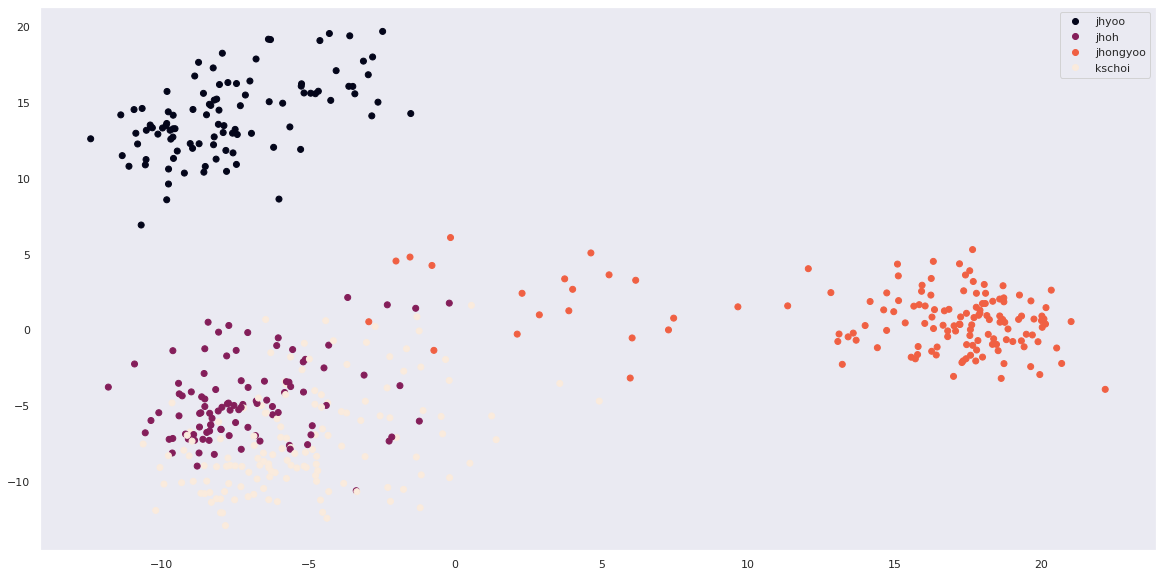

In [45]:
from utils import show_pca
label_list = ['jhyoo', 'jhoh', 'jhongyoo', 'kschoi']
show_pca(train_x_img, train_y, label_list)

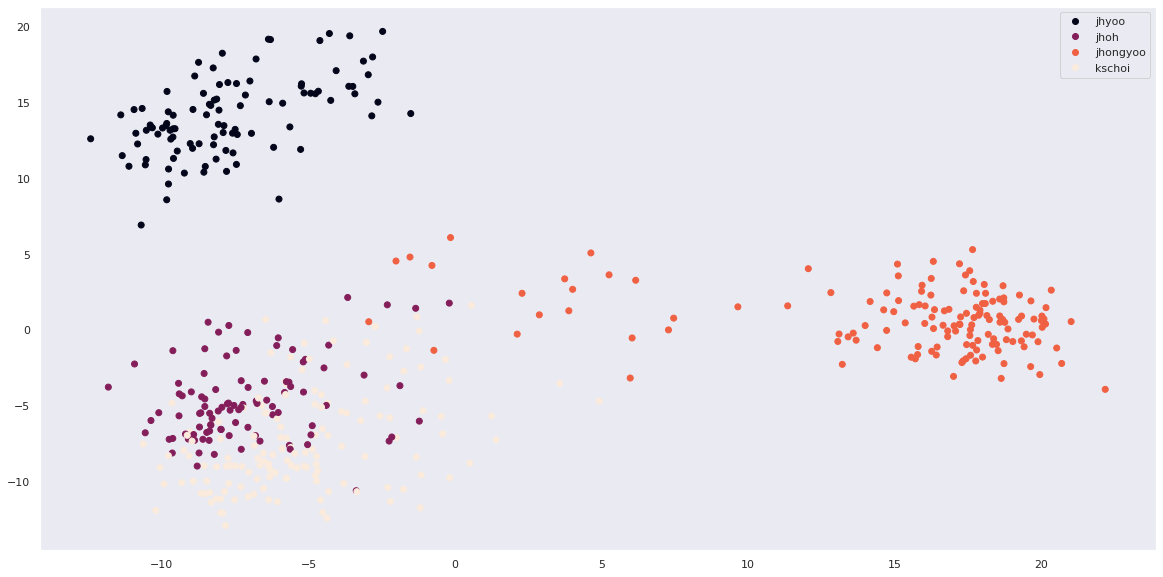

In [42]:
show_pca(train_x_emb, train_y, label_list)